<a href="https://www.kaggle.com/code/flaviocavalcante/product-reviews-analysis-olist?scriptVersionId=113322089" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings( 'ignore' )
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (14,6)

In [2]:
reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
products  = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
orders_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
product_descr = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")
sellers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv")

##                                   **SCHEMA**
<img src="https://i.imgur.com/HRhd2Y0.png" width="900px" height="600px">

In [3]:
#Merging the datasets on common keys as shown in the above data schema.
data = customers.merge(orders, on = 'customer_id') \
                .merge(orders_items, on = 'order_id') \
                .merge(reviews, on = 'order_id') \
                .merge(products, on = 'product_id') 

# columns = ['customer_id','customer_unique_id','order_id','product_id', 'order_item_id',
#            'review_score','price', 'order_status','product_category_name']
# data = data[columns].copy()
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [4]:
data.shape

(112372, 32)

In [5]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112372.000000,112372.000000,112372.000000,112372.000000,112372.000000,110774.000000,110774.000000,110774.000000,112354.000000,112354.000000,112354.000000,112354.000000
mean,35131.880691,1.196010,120.378962,19.977752,4.032473,48.777583,786.793932,2.207124,2090.610882,30.152198,16.576811,23.001210
std,29894.587573,0.691243,182.152386,15.781421,1.387849,10.025179,651.609498,1.719787,3748.608093,16.139323,13.437792,11.707552
min,1003.000000,1.000000,0.850000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11250.000000,1.000000,39.900000,13.070000,4.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24320.000000,1.000000,74.900000,16.250000,5.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,59063.000000,1.000000,134.900000,21.150000,5.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,21.000000,6735.000000,409.680000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [6]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

### **TOTAL REVIEWS BY PRODUCT**

In [7]:
total_votos = data.groupby('product_id')[['product_id']]\
                  .count()\
                  .rename(columns = {'product_id': 'total_reviews'})\
                  .sort_values(by ="total_reviews", ascending=False)
total_votos.head(10)

,total_reviews
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,524
422879e10f46682990de24d770e7f83d,486
99a4788cb24856965c36a24e339b6058,482
389d119b48cf3043d311335e499d9c6b,391
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,340
53b36df67ebb7c41585e8d54d6772e08,320
154e7e31ebfa092203795c972e5804a6,292


### **MEAN REVIEWS BY PRODUCT**

In [8]:
mean_reviews = data.groupby('product_id')[['review_score']]\
                    .mean()\
                    .rename(columns = {'review_score': 'avg_review'})\
                    .sort_values(by ="avg_review", ascending=False)
mean_reviews.head(10)

,avg_review
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
60314cbf527af04ebc935be7c02dc1cd,5.0
5fe23e6307c231e287f13c0a4be06c88,5.0
5fe490e61e7a37f2f0d1ad1771ac027d,5.0
c696cd2db7870be08c37822f7c0ef831,5.0
5fef486f2057e10fd91e167348812b7a,5.0
5ff4076c0f01eeba4f728c9e3fa2653c,5.0
5ff59c5f2db7600fa8143442c8b1e4f6,5.0
c68b419d9c6038271b85bac98adb0fc9,5.0


In [9]:
avg_price = data.groupby('product_id')[['price']]\
                 .mean()\
                 .rename(columns = {'price': 'avg_preco'})\
                 .sort_values(by ="avg_preco", ascending=False)
avg_price.head(10)

,avg_preco
product_id,
489ae2aa008f021502940f251d4cce7f,6735.00
1bdf5e6731585cf01aa8169c7028d6ad,6499.00
a6492cc69376c469ab6f61d8f44de961,4799.00
c3ed642d592594bb648ff4a04cee2747,4690.00
259037a6a41845e455183f89c5035f18,4590.00
a1beef8f3992dbd4cd8726796aa69c53,4399.87
6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
6902c1962dd19d540807d0ab8fade5c6,3999.90
4ca7b91a31637bd24fb8e559d5e015e4,3999.00


In [10]:
data_product = data[['product_id']] # New df to keep the agruped columns 
data_product.drop_duplicates(inplace = True)
data_product.set_index("product_id", inplace = True)

data_product['total_reviews'] = total_votos
data_product['avg_reviews']   = mean_reviews
data_product['avg_price']     = avg_price

data_product.head()

,total_reviews,avg_reviews,avg_price
product_id,,,
a9516a079e37a9c9c36b9b78b10169e8,59,3.423729,119.362881
4aa6014eceb682077f9dc4bffebc05b0,46,4.347826,291.885000
bd07b66896d6f1494f5b86251848ced7,10,3.800000,143.958000
a5647c44af977b148e0a3a4751a09e2e,20,3.600000,165.497000
9391a573abe00141c56e38d84d7d5b3b,4,3.250000,230.000000


In [11]:
data_product.shape

(32789, 3)

### **DIST AVAREGE REVIEWS**

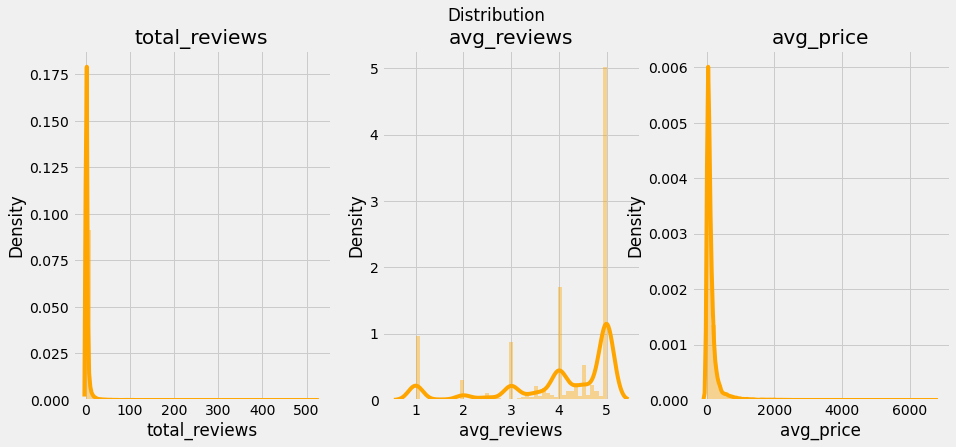

In [12]:
plt.suptitle("Distribution")
for i, feat in enumerate(data_product):
    plt.subplot(1,len(data_product.columns),i+1)
    sns.distplot(data_product[feat], color ='orange')
    plt.title(f"{feat}")

### We have a lot of products with an average of 5

In [13]:
min_qt_votos = min(data_product.query("avg_reviews == 5")['total_reviews'])
max_qt_votos = max(data_product.query("avg_reviews == 5")['total_reviews'])

print(f"min vote for products with media equal to 5: {min_qt_votos}")
print(f"max vote for products with media equal to 5: {max_qt_votos}")

min vote for products with media equal to 5: 1
max vote for products with media equal to 5: 15


#### Products with averages equal to 5 had few votes, which makes this average high.

### **VOTE LIMIT**
##### I defined a limit of votes for t'he products, in order to avoid that products with few votes stand out with high averages.

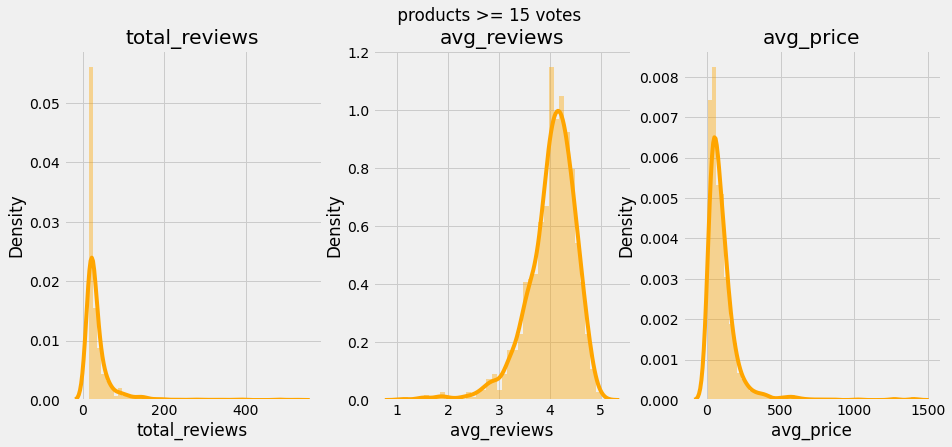

In [14]:
limit_total_review = 15
data_product = data_product[data_product.total_reviews >= limit_total_review ].copy()

plt.suptitle(" products >= 15 votes")
for i, feat in enumerate(data_product):
    plt.subplot(1,len(data_product.columns),i+1)
    sns.distplot(data_product[feat], color = 'orange')
    plt.title(f"{feat}")

#### Reviews on products are very fragmented. We have few products with many reviews and many products with few reviews, which causes this distortion in the avarege. By setting a voting limit in order to avoid products with too few reviews, I cause another problem which is to reduce the dataset by 90%.

In [15]:
data_product.shape

(1082, 3)